# Explore here

In [36]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib 

Loading the dataset 

In [37]:
df = pd.read_csv('/workspaces/JMT1ST-K-MEANS/housing.csv')
pd.set_option('display.max_columns', None)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Quick EDA 

In [38]:
#Inspecting the shape to understand the ds magnitud
df.shape

(20640, 9)

In [39]:
#Inspecting the info to check the distribution of types of values and the values itself 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


As the project requirement is to classify houses according to their region and median income and our ds contains the specific variables that we need, we will clean the ds by grouping the relevant columns for our prediction (Geographical data and median income) and working with them.

In [40]:
#Selecting the columns to work with instead of dropping the irrelevant variables (just practicing other ways of doing things )
features = df[['Latitude', 'Longitude', 'MedInc']]

In [41]:
#Checking the grouped df info to confirm it was grouped correctly 
features.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


Now that we are working with a dataset that only contains the relevant variables let's proceed with the data partitioning

In [42]:
#Declaring that our X_train and X_test is equal to our features df (not using y as we are not predicting yet)
X_train, X_test = train_test_split(features, test_size=0.2, random_state=42)

In [43]:
#Checking the new shape of both X for confirmation 
print(X_train.shape)
print(X_test.shape)
X_train.head()

(16512, 3)
(4128, 3)


,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

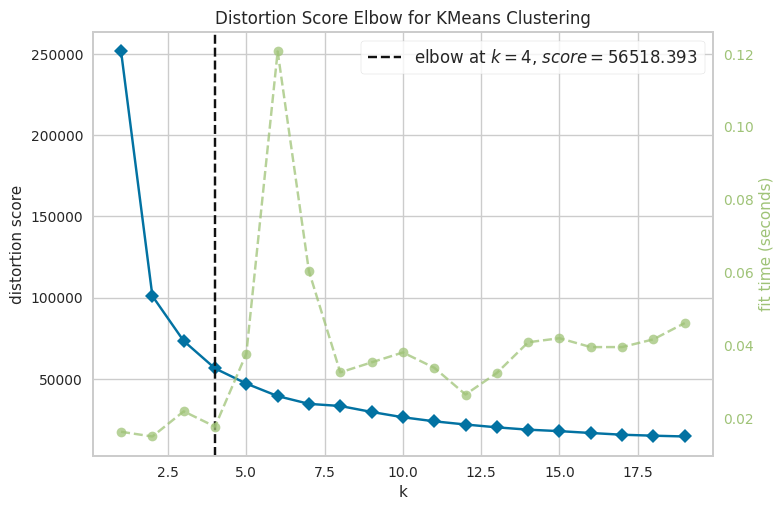

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
#Visualizing the proper number of clusters using the elbow method
elbow_vis = KElbowVisualizer(KMeans(random_state=42), k=(1, 20))
elbow_vis.fit(features)
elbow_vis.show()

The Elbow Method plot shows a noticeable drop in within-cluster sum of squares (WCSS) up to k = 4, after which the ratiio of improvement slows significantly. This "elbow" point suggests that using 4 clusters provides a good balance. Therefore, k = 4 is the optimal number of clusters for segmenting this dataset.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

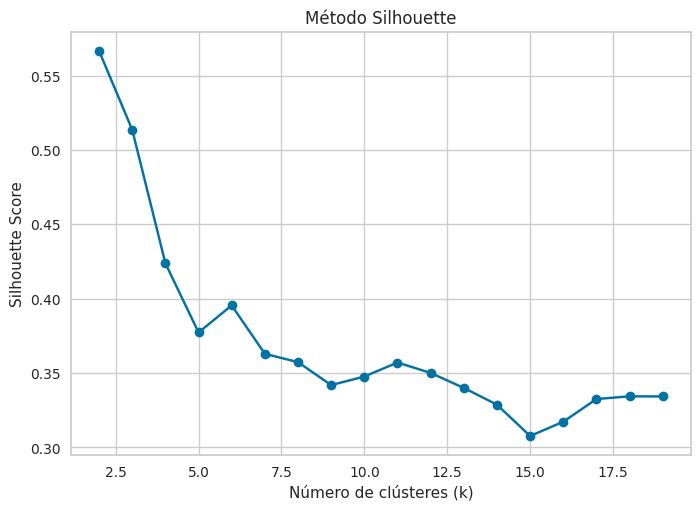

In [45]:
# Try different k values to see which gives the best silhouette score
k_values = range(2, 20)
silhouette_scores = []

for k in k_values:
    cluster_labels = KMeans(n_clusters=k, random_state=42).fit_predict(features)
    silhouette_scores.append(silhouette_score(features, cluster_labels))

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Silhouette Score')
plt.title('Método Silhouette')
plt.grid(True)
plt.show()

The Silhouette Method plot reveals that the highest silhouette score occurs at k = 4, indicating the strongest separation and cohesion among clusters at this value confirming that four clusters offer the most meaningful and natural grouping for the data.

Based on these evaluations, we consider `k=4` clusters as a good balance between model complexity and performance, however, following the instructions on the dashboard first we will set K to 6.

Let's continue and train the model, but first we need to scale the data.

In [46]:
#Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

Building K-Means

In [47]:
#Creating and fiting the moel using 6 groups as instructed in the dashboard
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)

#Adding the cluster labels back to the original (unscaled) X_train
X_train['cluster'] = clusters

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

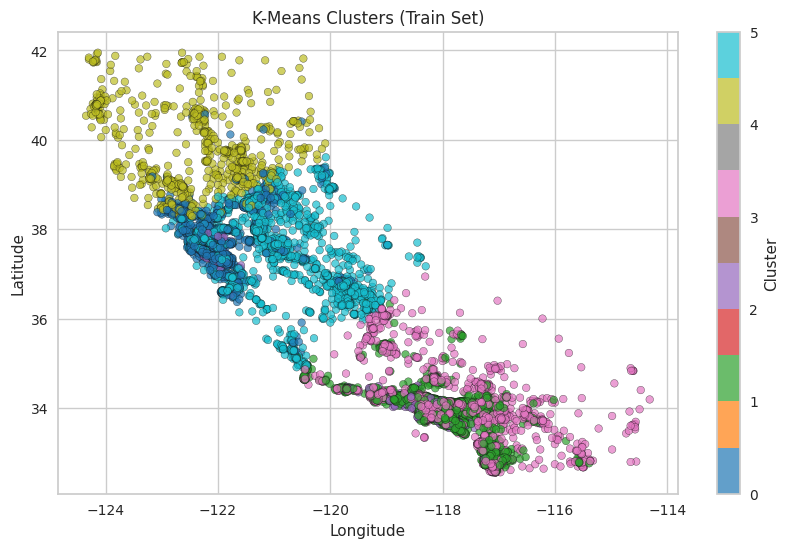

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(
    X_train['Longitude'], 
    X_train['Latitude'], 
    c=X_train['cluster'], 
    cmap='tab10', 
    s=30,
    alpha=0.7,
    edgecolor='k' 
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clusters (Train Set)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

The K-Means clustering map shows that the data points were grouped into clear regions based on their geographic location. The results suggest that using location helped the model find meaningful groups, and the number of clusters chosen seems to represent the structure in the data effectively.

Predicting with the test set

In [49]:
#Transforming X_test to it's scaled version 
X_test_scaled = scaler.transform(X_test)

In [50]:
#Using the method predict with the argument of X_test_Scaled to get the "Test clusters"
test_clusters = kmeans.predict(X_test_scaled)
X_test['cluster'] = test_clusters

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

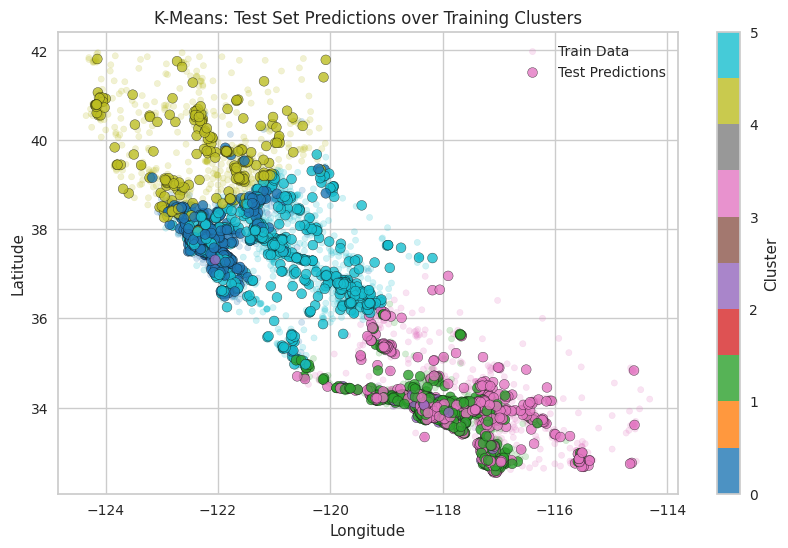

In [51]:
plt.figure(figsize=(10, 6))

#For Training data
plt.scatter(
    X_train['Longitude'], 
    X_train['Latitude'], 
    c=X_train['cluster'], 
    cmap='tab10',
    s=20, 
    alpha=0.2, 
    label='Train Data'
)

#Fo r Test data
plt.scatter(
    X_test['Longitude'], 
    X_test['Latitude'], 
    c=X_test['cluster'], 
    cmap='tab10', 
    s=50, 
    edgecolor='k', 
    alpha=0.8, 
    label='Test Predictions'
)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means: Test Set Predictions over Training Clusters')
plt.legend()
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


The test poiints mostly fall into the same cluster areas as the training points, which means the model is doing a good job. It’s recognizing similar patterns in the new data and placing them in the right groups. This tells us the model is stable and works well with unseen data.

Training a supervised classification model

In [53]:
#Instancing the model and fitting X_train 
clf = LogisticRegression(max_iter=200)
clf.fit(X_train_scaled, clusters)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [55]:
#Predicting and instancing y_pred
y_pred = clf.predict(X_test_scaled)

In [58]:
#Classification report
print("Classification Report:\n")
print(classification_report(test_clusters, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(test_clusters, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       557
           1       0.99      1.00      0.99       897
           2       0.99      0.97      0.98       116
           3       1.00      0.99      1.00      1397
           4       1.00      0.91      0.95       246
           5       0.97      0.99      0.98       915

    accuracy                           0.99      4128
   macro avg       0.99      0.98      0.98      4128
weighted avg       0.99      0.99      0.99      4128


Confusion Matrix:
[[ 556    0    1    0    0    0]
 [   0  894    0    1    0    2]
 [   0    4  112    0    0    0]
 [   0    2    0 1390    0    5]
 [   0    0    0    0  224   22]
 [   8    1    0    3    0  903]]


Logistic Regression model was trained as a supervised classifier to predict these cluster labels using the scaled features. The classification results were excellent, with approximately 99% accuracy and high precision, recall, and F1-scores across all clusters, demonstrating that the logistic model reliably replicates the unsupervised clustering.

Saving the models

In [59]:
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(clf, "random_forest_model.pkl")

['random_forest_model.pkl']